**Import Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

**Importing DataSet**

In [2]:
df=pd.read_csv('/content/Supplement_Sales_Weekly_Expanded.csv')
df.head()

,Date,Product Name,Category,Units Sold,Price,Revenue,Discount,Units Returned,Location,Platform
0,2020-01-06,Whey Protein,Protein,143,31.98,4573.14,0.03,2,Canada,Walmart
1,2020-01-06,Vitamin C,Vitamin,139,42.51,5908.89,0.04,0,UK,Amazon
2,2020-01-06,Fish Oil,Omega,161,12.91,2078.51,0.25,0,Canada,Amazon
3,2020-01-06,Multivitamin,Vitamin,140,16.07,2249.80,0.08,0,Canada,Walmart
4,2020-01-06,Pre-Workout,Performance,157,35.47,5568.79,0.25,3,Canada,iHerb


**Checking DataSet Describtion**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4384 entries, 0 to 4383
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            4384 non-null   object 
 1   Product Name    4384 non-null   object 
 2   Category        4384 non-null   object 
 3   Units Sold      4384 non-null   int64  
 4   Price           4384 non-null   float64
 5   Revenue         4384 non-null   float64
 6   Discount        4384 non-null   float64
 7   Units Returned  4384 non-null   int64  
 8   Location        4384 non-null   object 
 9   Platform        4384 non-null   object 
dtypes: float64(3), int64(2), object(5)
memory usage: 342.6+ KB


In [4]:
df.describe()

,Units Sold,Price,Revenue,Discount,Units Returned
count,4384.000000,4384.000000,4384.000000,4384.000000,4384.000000
mean,150.200274,34.781229,5226.569446,0.124398,1.531478
std,12.396099,14.198309,2192.491946,0.071792,1.258479
min,103.000000,10.000000,1284.000000,0.000000,0.000000
25%,142.000000,22.597500,3349.372500,0.060000,1.000000
50%,150.000000,34.720000,5173.140000,0.120000,1.000000
75%,158.000000,46.712500,7009.960000,0.190000,2.000000
max,194.000000,59.970000,10761.850000,0.250000,8.000000


**Checking NULL values in Data**

In [5]:
df.isna().sum()

,0
Date,0
Product Name,0
Category,0
Units Sold,0
Price,0
Revenue,0
Discount,0
Units Returned,0
Location,0
Platform,0


**Feature Engineering**

In [15]:
for col in ['Product Name', 'Category', 'Location', 'Platform']:
    print(f"Unique values for {col}:")
    print(df[col].unique())

Unique values for Product Name:
['Whey Protein' 'Vitamin C' 'Fish Oil' 'Multivitamin' 'Pre-Workout' 'BCAA'
 'Creatine' 'Zinc' 'Collagen Peptides' 'Magnesium' 'Ashwagandha'
 'Melatonin' 'Biotin' 'Green Tea Extract' 'Iron Supplement'
 'Electrolyte Powder']
Unique values for Category:
['Protein' 'Vitamin' 'Omega' 'Performance' 'Amino Acid' 'Mineral' 'Herbal'
 'Sleep Aid' 'Fat Burner' 'Hydration']
Unique values for Location:
['Canada' 'UK' 'USA']
Unique values for Platform:
['Walmart' 'Amazon' 'iHerb']


In [17]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Platform']=le.fit_transform(df['Platform'])
df['Location']=le.fit_transform(df['Location'])
df['Category']=le.fit_transform(df['Category'])
df['Product Name']=le.fit_transform(df['Product Name'])
df.head()

,Date,Product Name,Category,Units Sold,Price,Revenue,Discount,Units Returned,Location,Platform
0,2020-01-06,14,7,143,31.98,4573.14,0.03,2,0,1
1,2020-01-06,13,9,139,42.51,5908.89,0.04,0,1,0
2,2020-01-06,6,5,161,12.91,2078.51,0.25,0,0,0
3,2020-01-06,11,9,140,16.07,2249.80,0.08,0,0,1
4,2020-01-06,12,6,157,35.47,5568.79,0.25,3,0,2


# Linear Regression

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
X = df.drop('Revenue', axis=1)
y = np.log1p(df['Revenue'])
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
lr=LinearRegression()
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
print('Mean Squared Error:',mse)
print('Mean Absolute Error:',mae)
print('R-squared:',r2*100,'%')

Mean Squared Error: 0.011667490415624692
Mean Absolute Error: 0.08748791485448547
R-squared: 94.88802951362086 %


In [34]:
rmse = mse**0.5
print('Root Mean Squared Error:', rmse)

Root Mean Squared Error: 0.10801615812286924


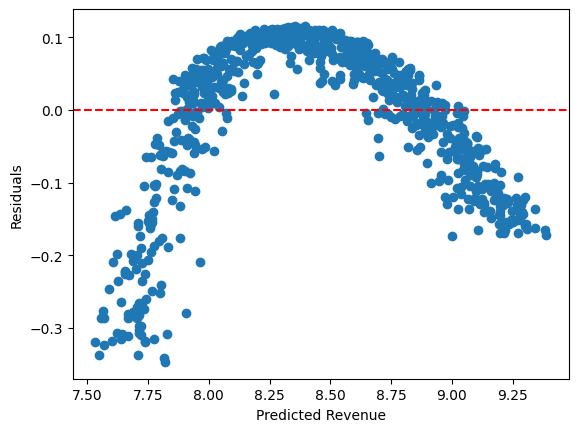

In [35]:
residuals = y_test - y_pred
import matplotlib.pyplot as plt
plt.scatter(y_pred, residuals)
plt.xlabel("Predicted Revenue")
plt.ylabel("Residuals")
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

In [41]:
avg_revenue = df['Revenue'].mean()
print(f"Average Revenue: ${avg_revenue:.2f}")
print(f"Relative RMSE (% of avg revenue): {(0.108 / avg_revenue) * 100:.2f}%")

Average Revenue: $5226.57
Relative RMSE (% of avg revenue): 0.00%


# RandomForestRegression

In [38]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('Mean Squared Error:', mse)
print('Mean Absolute Error:', mae)
print('R-squared:', r2*100, '%')

Mean Squared Error: 0.00014068916177437254
Mean Absolute Error: 0.006422634541213916
R-squared: 99.9383587372156 %


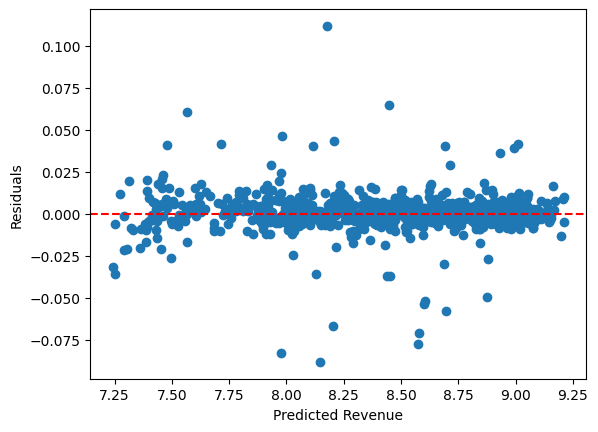

In [39]:
residuals = y_test - y_pred
import matplotlib.pyplot as plt
plt.scatter(y_pred, residuals)
plt.xlabel("Predicted Revenue")
plt.ylabel("Residuals")
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

In [40]:
rmse = mse**0.5
print('Root Mean Squared Error:', rmse)

Root Mean Squared Error: 0.011861246215064104


In [42]:
avg_revenue = df['Revenue'].mean()
print(f"Average Revenue: ${avg_revenue:.2f}")
print(f"Relative RMSE (% of avg revenue): {(0.0118 / avg_revenue) * 100:.2f}%")

Average Revenue: $5226.57
Relative RMSE (% of avg revenue): 0.00%
